In [1]:
# Some business Objectives:

#  Retain customers,
#  Analyze relevant customer data,
#  Develop focused customer retention programs.
#  Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.



#1. Import the necessary libraries.

#2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

#3. First look at its main features (head, shape, info).

#4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

#5. Change effective to date column to datetime format.

#6. Define a function that differentiates between continuous and discrete variables. 
#   Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and 
#   do the same for discrete_df

#7. Plot a correlation matrix, comment what you see.

#8. Create a function to plot every discrete variable. Do the same with the continuous variables 
#   (Be Careful, you may need to change the plot type to one better suited for continuous data!)

#9. Comment what you can see in the plots.

#10. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

#11. Did you find outliers? Comment what you will do with them.

#12. Check all columns for NaN values. Decide what (if anything) you will need to do with them.


#1. Import the necessary libraries if you are starting a new notebook. Using the same data as the previous lab: 
#   we_fn_use_c_marketing_customer_value_analysis.csv

#2. Find all of the categorical data. Save it in a categorical_df variable.

#3. Check for NaN values.

#4. Check all unique values of columns.

#5. Check dtypes. Do they all make sense as categorical data?

#6. Does any column contain alpha and numeric data? Decide how to clean it.

#7. Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions.

#8. Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

#9. Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your 
#   thoughts and make those changes.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [4]:
customer_df.info

<bound method DataFrame.info of      Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  ...  \
0     Bachelor    

In [5]:
def snake_case(df):
    cols = []
    for c in df.columns:
        cols.append(c.lower())
    df.columns = cols
    cols_ = df.columns.str.replace(' ', '_')
    df.columns = cols_
    return df

customer_df = snake_case(customer_df)
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [6]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])


In [7]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [8]:
customer_df.isnull().sum()/len(customer_df)

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

In [9]:
customer_df.nunique()

customer                         9134
state                               5
customer_lifetime_value          8041
response                            2
coverage                            3
education                           5
effective_to_date                  59
employmentstatus                    5
gender                              2
income                           5694
location_code                       3
marital_status                      3
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
policy_type                         3
policy                              9
renew_offer_type                    4
sales_channel                       4
total_claim_amount               5106
vehicle_class                       6
vehicle_size                        3
dtype: int64

In [10]:
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [11]:
def discr_cont(df):
    cat = customer_df.select_dtypes(include=object)
    continuous = []
    discrete = []
    
    for c in customer_df.select_dtypes(include=np.number):
        if len(df[c].unique()) < 10:
            discrete.append(c)
        else:
            continuous.append(c)
    return cat, continuous, discrete

cat, continuous, discrete = discr_cont(customer_df)

print(continuous)
print(discrete)

['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'total_claim_amount']
['number_of_open_complaints', 'number_of_policies']


In [12]:
continuous_df = pd.DataFrame(data=customer_df,columns=continuous)
continuous_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879
...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,198.234764
9130,3096.511217,21604,79,14,28,379.200000
9131,8163.890428,0,85,9,37,790.784983
9132,7524.442436,21941,96,34,3,691.200000


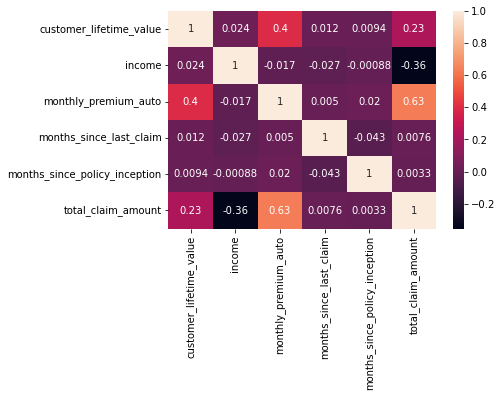

In [13]:
correlations_matrix = continuous_df.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [14]:
#total claim amount & monthly premium auto are highly correlated. monthly premium auto & customer lifetime value has the second highest correlation

In [16]:
discrete_df = pd.DataFrame(data=customer_df,columns=discrete)
discrete_df

,number_of_open_complaints,number_of_policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1
...,...,...
9129,0,2
9130,0,1
9131,3,2
9132,0,3


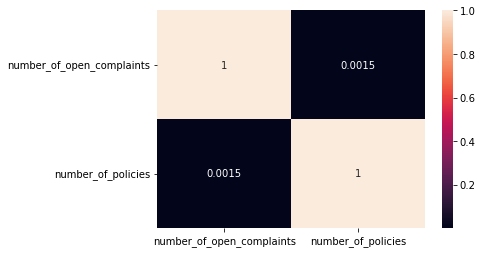

In [17]:
# kinda pointless lol

correlations_matrix = discrete_df.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

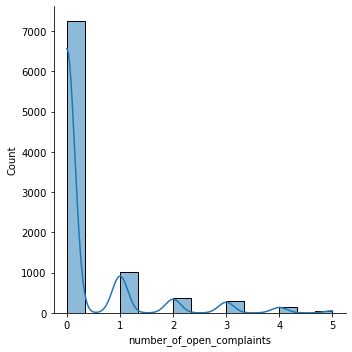

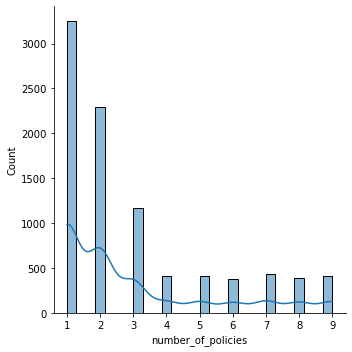

In [18]:
for i, column in enumerate(discrete_df.columns, 1):
    sns.displot(discrete_df[column], kde=True)

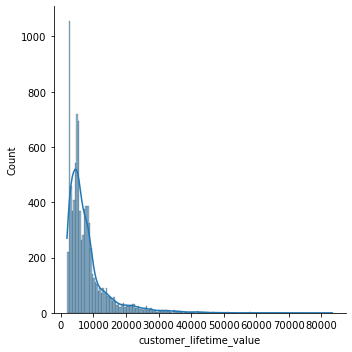

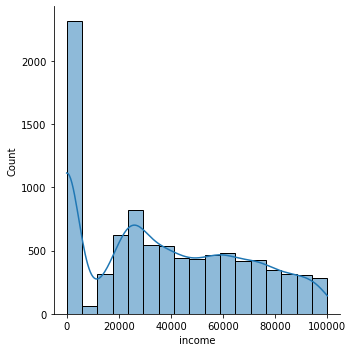

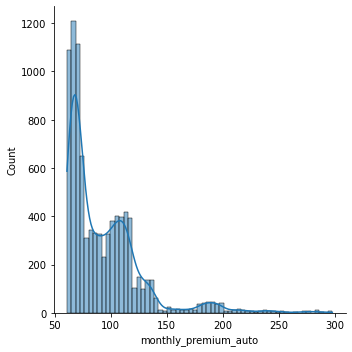

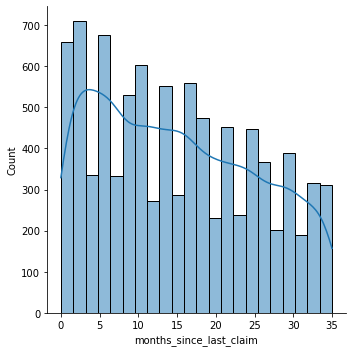

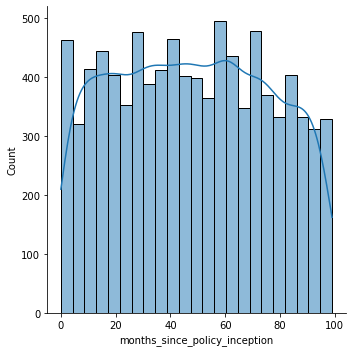

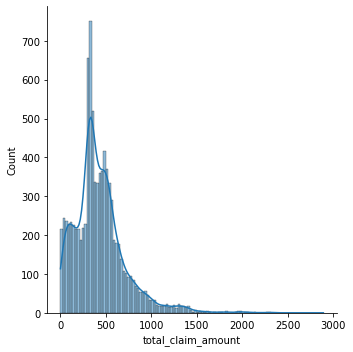

In [19]:
for i, column in enumerate(continuous_df.columns, 1):
    sns.displot(continuous_df[column], kde=True)

In [20]:
def log_transfom_clean(x):
    if x>0:
        return np.log(x)
    else:
        return np.NAN

{'whiskers': [<matplotlib.lines.Line2D at 0x156941639d0>,
 'caps': [<matplotlib.lines.Line2D at 0x15694163f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x15694163700>],
 'medians': [<matplotlib.lines.Line2D at 0x156941734f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x156941737c0>],
 'means': []}

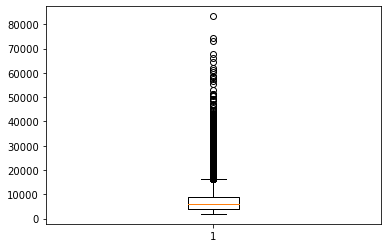

In [21]:

plt.boxplot(continuous_df['customer_lifetime_value'])

{'whiskers': [<matplotlib.lines.Line2D at 0x156941cbb50>,
 'caps': [<matplotlib.lines.Line2D at 0x156941d8130>,
 'boxes': [<matplotlib.lines.Line2D at 0x156941cb9a0>],
 'medians': [<matplotlib.lines.Line2D at 0x156941d8670>],
 'fliers': [<matplotlib.lines.Line2D at 0x156941d8940>],
 'means': []}

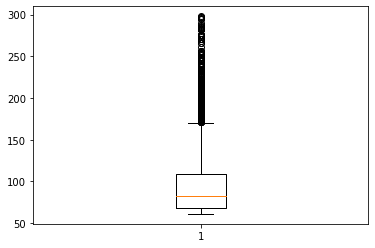

In [22]:
plt.boxplot(continuous_df['monthly_premium_auto'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1569422bb50>,
 'caps': [<matplotlib.lines.Line2D at 0x1569423b130>,
 'boxes': [<matplotlib.lines.Line2D at 0x1569421e6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1569423b670>],
 'fliers': [<matplotlib.lines.Line2D at 0x1569423b940>],
 'means': []}

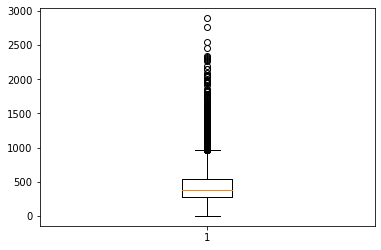

In [23]:
plt.boxplot(continuous_df['total_claim_amount'])

In [24]:
categorical_df = customer_df.select_dtypes(object)

In [25]:
categorical_df

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [26]:
categorical_df['state'].value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

In [27]:
categorical_df['location_code'].value_counts()

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

In [28]:
categorical_df['education'].value_counts() # I won't change as college could mean they have attended some college and Bachelor could mean they finished

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

In [29]:
categorical_df['employmentstatus'].value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

In [30]:
def clean(x):
    if x in ['Medical Leave']:
        return 'Disabled'
    else:
        return x
    
categorical_df['employmentstatus'] = list(map(clean, categorical_df['employmentstatus']))
categorical_df['employmentstatus'].value_counts()

Employed      5698
Unemployed    2317
Disabled       837
Retired        282
Name: employmentstatus, dtype: int64

In [31]:
categorical_df['location_code'].value_counts()

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

In [32]:
categorical_df['policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [33]:
categorical_df['policy_type'].value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

In [34]:
categorical_df['response'].value_counts()

No     7826
Yes    1308
Name: response, dtype: int64

In [35]:
categorical_df['coverage'].value_counts()

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

In [36]:
categorical_df['gender'].value_counts()

F    4658
M    4476
Name: gender, dtype: int64

In [37]:
categorical_df['marital_status'].value_counts()

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

In [38]:
categorical_df['sales_channel'].value_counts()

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

In [39]:
categorical_df['renew_offer_type'].value_counts()

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

In [40]:
categorical_df['vehicle_size'].value_counts()

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

In [ ]:
# most have four or less so it's no need to combine any. This excludes employment status & policy. Depending on what we are looking for determines if they should be combined.